In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#plt.style.use('notebook_style')

In [7]:
def get_memory(filename):
    """Return used memory with the offset (used memory before start of program)
    removed as a list.
    """

    with open(filename) as file:
        
        lines = file.readlines()
        columns = lines[0].split()
        
        data = []
        
        for line in lines[1:]:
            data.append([float(ele) for ele in line.split()[1:]])

    memory = pd.DataFrame(data, columns=columns)
    memory = list(memory['used'])
    memory = [ele - memory[0] for ele in memory]
    
    return memory

In [8]:
from collections import namedtuple

MemoryData = namedtuple('memory_data', 'norb nk nw data')

In [5]:
import itertools

memories = []

for norb, nk, nw in itertools.product([1, 4, 6], [256], [10000]):
    memories.append(MemoryData(norb, nk, nw, get_memory('./data/norb_%s_nk_%s_nw_%s.txt'%(norb, nk, nw))))

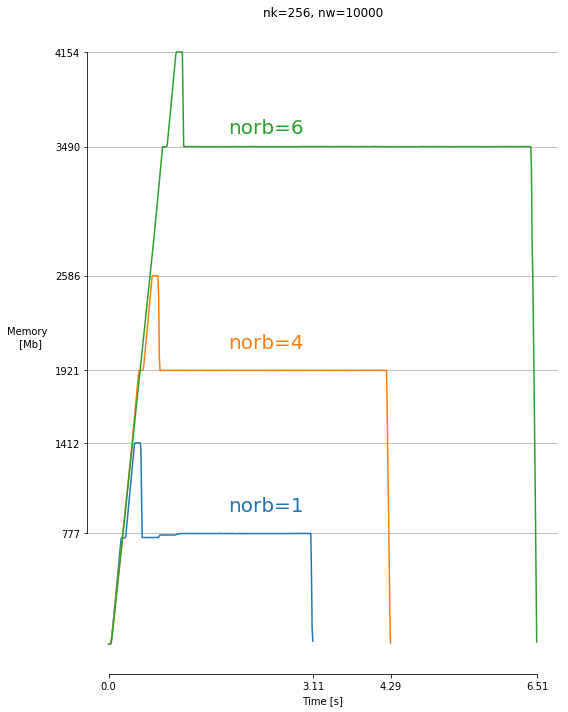

In [11]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111)

for memory in memories:
    ax.plot(memory.data, "-")

ax.set_xlabel('Time [s]')
ax.set_ylabel('Memory \n [Mb]', rotation=0, ha='right', multialignment='center')

xticks_values = [0]
for memory in memories:
    xticks_values.append(len(memory.data))
ax.set_xticks(xticks_values)

it = 0.01
ax.set_xticklabels([str(ele*it) for ele in xticks_values])

yticks_values = []
for memory in memories:
    yticks_values.append(max(memory.data))
    yticks_values.append(memory.data[-10])

ax.set_yticks([ele for ele in yticks_values])

plt.annotate('norb=1', xy=(.3,.25), xycoords="axes fraction", size=20, color='C0')
plt.annotate('norb=4', xy=(.3,.5), xycoords="axes fraction", size=20, color='C1')
plt.annotate('norb=6', xy=(.3,.83), xycoords="axes fraction", size=20, color='C2')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['bottom'].set_bounds(xticks_values[0], xticks_values[-1])
ax.spines['left'].set_bounds(yticks_values[1], yticks_values[-2])

plt.grid(axis='y')

ax.set_title("nk=%s, nw=%s"%(nk, nw))

fig.tight_layout()

#plt.savefig('./plots/norb_comparison_nk_256_nw_10000')